In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
coasters = pd.read_csv('roller_coasters.csv')

In [3]:
print(steel.head())
print(wood.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo’s Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  
   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebel

In [4]:
def plot_of_ride_rating_by_year(ride_name, ranking_df, park):
    data = ranking_df[(ranking_df['Name'] == ride_name) & (ranking_df['Park'] == park)]
    
    x_data = data['Year of Rank']
    y_data = data['Rank']
    
    years = x_data.values
    plt.clf()
    ax = plt.subplot()
    plt.plot(x_data, y_data)
    
    ax.invert_yaxis()
    ax.set_xticks(years)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    
     
    plt.title('A look at how ' + ride_name + ', ' + park + ' has ranked over the years.')
    plt.show()
    

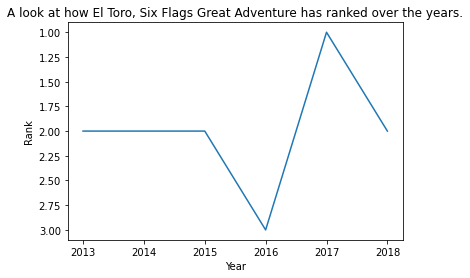

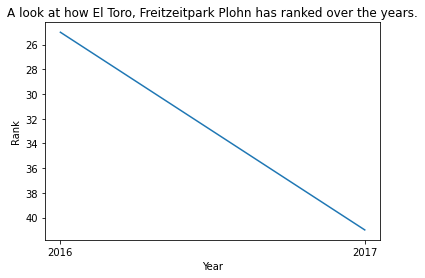

In [5]:
plot_of_ride_rating_by_year('El Toro', wood, 'Six Flags Great Adventure')
plot_of_ride_rating_by_year('El Toro', wood, 'Freitzeitpark Plohn')

In [6]:
def compare_coaster_rankings(ride_name1, ride_name2, ranking_df, park1, park2):
    data1 = ranking_df[(ranking_df['Name'] == ride_name1) & (ranking_df['Park'] == park1)]
    data2 = ranking_df[(ranking_df['Name'] == ride_name2) & (ranking_df['Park'] == park2)]
    
    x_data1 = data1['Year of Rank']
    y_data1 = data1['Rank']
    x_data2 = data2['Year of Rank']
    y_data2 = data2['Rank']
    
#     years = x_data.values
    rankings = y_data2.values
#     lowest_ranking = int(max(y_data1 + y_data2))
    plt.clf()
    ax = plt.subplot()
    plt.plot(x_data1, y_data1, color='green')
    plt.plot(x_data2, y_data2)
    
    ax.invert_yaxis()
#     ax.set_xticks(years)
#     ax.set_yticks(list(range(1, lowest_ranking)))
    plt.xlabel('Year')
    plt.ylabel('Rank')
    
     
    plt.title('A look at how ' + ride_name1 + ', ' + park1 + ' has ranked over the years.')
    plt.show()

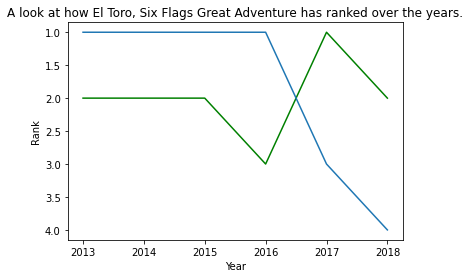

In [7]:
compare_coaster_rankings('El Toro', 'Boulder Dash', wood, 'Six Flags Great Adventure', 'Lake Compounce')

In [8]:
def top_rollercoasters(n, df):
    top_n = df[(df['Rank'] <= n)]
    all_rides = df[df['Rank'] <= n]
    
    ax= plt.subplot()
    
    coasters = all_rides['Name'].unique()
    print(coasters)
    for coaster in coasters:
        data = all_rides[all_rides['Name'] == coaster]
        
        x_data = data['Year of Rank']
        y_data = data['Rank']
            
        plt.plot(x_data, y_data, label=coaster, marker="x")
        
        
        
    ax.invert_yaxis()
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title('How the top ' + str(n) + ' rides ranked over time.')
    ax.set_ylabel('Rank')
    ax.set_xlabel('Year')
    plt.show()
    

['Boulder Dash' 'El Toro' 'Phoenix' 'The Voyage' 'Thunderhead'
 'Ravine Flyer II' 'Outlaw Run' 'Gold Striker' 'The Beast' 'Voyage'
 'Lightning Rod' 'Beast']


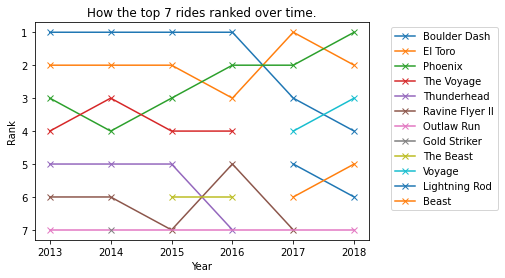

In [9]:
top_rollercoasters(7, wood)

In [10]:
print(coasters.head())
print(coasters.dtypes)

            name material_type seating_type  speed  height  length  \
0       Goudurix         Steel     Sit Down   75.0    37.0   950.0   
1  Dream catcher         Steel    Suspended   45.0    25.0   600.0   
2     Alucinakis         Steel     Sit Down   30.0     8.0   250.0   
3       Anaconda        Wooden     Sit Down   85.0    35.0  1200.0   
4         Azteka         Steel     Sit Down   55.0    17.0   500.0   

   num_inversions     manufacturer            park            status  
0             7.0           Vekoma    Parc Asterix  status.operating  
1             0.0           Vekoma   Bobbejaanland  status.operating  
2             0.0         Zamperla    Terra Mítica  status.operating  
3             0.0  William J. Cobb  Walygator Parc  status.operating  
4             0.0           Soquet          Le Pal  status.operating  
name               object
material_type      object
seating_type       object
speed             float64
height            float64
length            float

In [11]:
def plot_hist_of_numerical_column(df, col_name):
    if df[col_name].dtype != 'float64':
        print('Can not plot histogram of non-numerical column.')
        
    if col_name == 'height':
        df = df[df[col_name] < 300]
        
    df = df.dropna()
    ax = plt.subplot()
    plt.hist(df[col_name])
    plt.xlabel('Count')
    plt.ylabel('Number of rollercoasters')
    plt.title("Histogram of roller coaster's " + col_name + ".")
    plt.show()

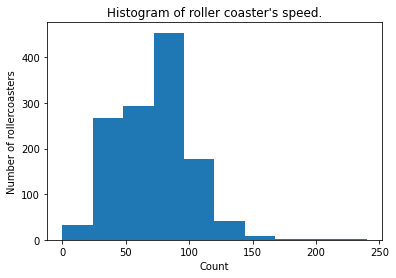

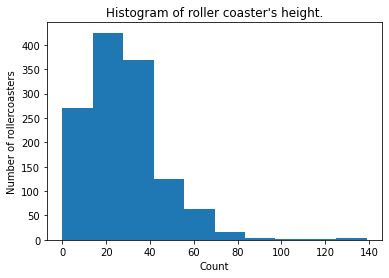

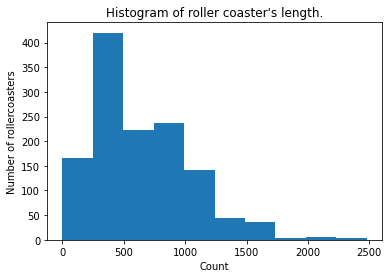

In [12]:
plot_hist_of_numerical_column(coasters, 'speed')
plot_hist_of_numerical_column(coasters, 'height')
plot_hist_of_numerical_column(coasters, 'length')

In [57]:
def num_inversions_at_park(df, park):
    
    df = df[df['park'] == park]
    
    x_data = df['name']
    y_data = df['num_inversions']
    
    ax = plt.subplot()
    ax.bar(x=x_data, height=y_data)
    plt.title('Number of inversions for each roller coaster at ' + park)
    plt.ylabel('Number of inversions')
    plt.xticks(rotation=90)
    plt.show()

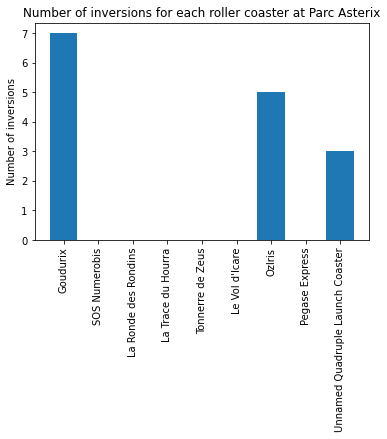

In [58]:
num_inversions_at_park(coasters, 'Parc Asterix')

In [126]:
def pie_chart_of_active_coasters(df=coasters):
    pie_df = df['status'].value_counts().reset_index()
    pie_df.columns = ['status', 'count']
    
    pie_df = pie_df[(pie_df['status'] == 'status.operating') | (pie_df['status'] == 'status.closed.definitely') ]
    
    ax = plt.subplot()
    plt.pie(x = pie_df['count'], normalize=True, labels=['Operating', 'Definitely Closed'], autopct='%0.1f%%', colors=['lawngreen', 'red'])
    plt.title('Comparison of operating and closed roller coasters')
    plt.show()
    

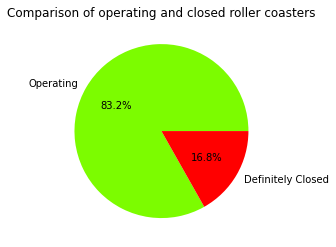

In [127]:
pie_chart_of_active_coasters(coasters)

In [141]:
def scatter_of_two_columns(df, col1, col2):
    data_col1 = df[col1]
    data_col2 = df[col2]
    
    ax = plt.subplot()
    plt.scatter(data_col1, data_col2)
    plt.xlabel(str(col1))
    plt.ylabel(str(col2))
    plt.title(col1 +' VS ' + col2)
    plt.show()

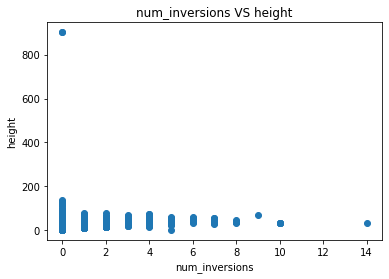

In [142]:
scatter_of_two_columns(coasters, 'num_inversions', 'height')